In [1]:
library(ggplot2)
library(reshape2) # melt

load("Setting1_small.RData")
load("Setting2_small.RData")
load("Setting3_small.RData")
load("Setting4_small.RData")
load("Setting5_small.RData")
load("Setting6_small.RData")
load("Setting7_small.RData")
load("Setting8_small.RData")

nsimul = 500

Warning message:
"package 'ggplot2' was built under R version 3.6.3"


# Simulation Setting

<img src= "simulation_setting.png">

For each of the 8 simulation settings: 

* Number of simulated datasets for each simulation setting, nsimul = 500
* Number of posterior samples, $B$ = 1000 
* MCMC burn-in period = 2000

For each simulated datasets, get the $B=1000$ posterior samples from 
* MCMC using blasso
* Random-weighting schemes 1,2,3: same $\lambda$ for each simulated dataset, obtained based on CV on unweighted 2-step procedure 
* Residual bootstrap: same $\lambda$ for each simulated dataset, obtained from cv.glmnet

# Distribution of $\lambda$

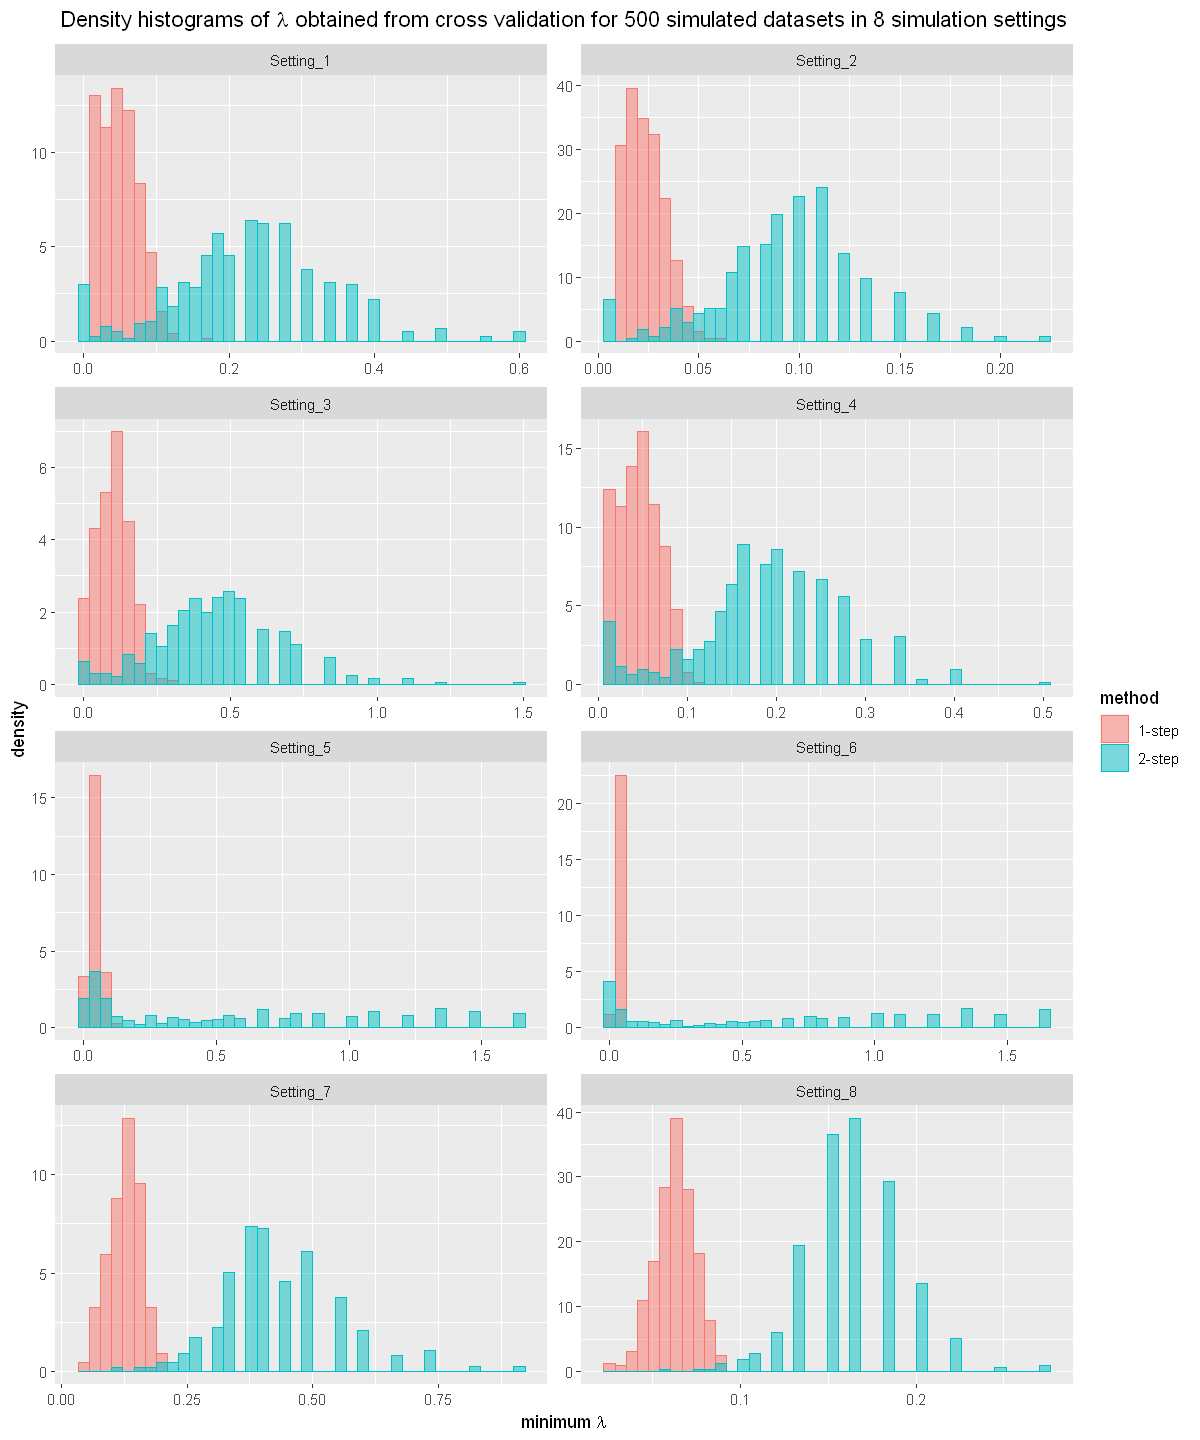

In [4]:
options(repr.plot.width = 10, repr.plot.height = 12)
lambda_df <- data.frame(
  value = c(
    setting1_small$lamb_1step,
    setting1_small$lamb_2step,
    setting2_small$lamb_1step,
    setting2_small$lamb_2step,
    setting3_small$lamb_1step,
    setting3_small$lamb_2step,
    setting4_small$lamb_1step,
    setting4_small$lamb_2step,
    setting5_small$lamb_1step,
    setting5_small$lamb_2step,
    setting6_small$lamb_1step,
    setting6_small$lamb_2step,
    setting7_small$lamb_1step,
    setting7_small$lamb_2step,
    setting8_small$lamb_1step,
    setting8_small$lamb_2step
  ),
  method = rep( rep(c("1-step","2-step"), each = nsimul), 8 ),
  Setting = rep( paste0("Setting_", c(1:8)), each = 2*nsimul )
)
ggplot(lambda_df, aes(x = value, color = method, fill = method)) +
  geom_histogram(aes(y=..density..), alpha=.5, position = "identity", bins=40) +
  facet_wrap(~Setting, ncol = 2, scales = "free") +
  labs(x = expr(paste("minimum ", lambda)), title = expr(paste("Density histograms of ",lambda," obtained from cross validation for 500 simulated datasets in 8 simulation settings"))) +
  theme(plot.title = element_text(hjust = 0.5))

# MSE

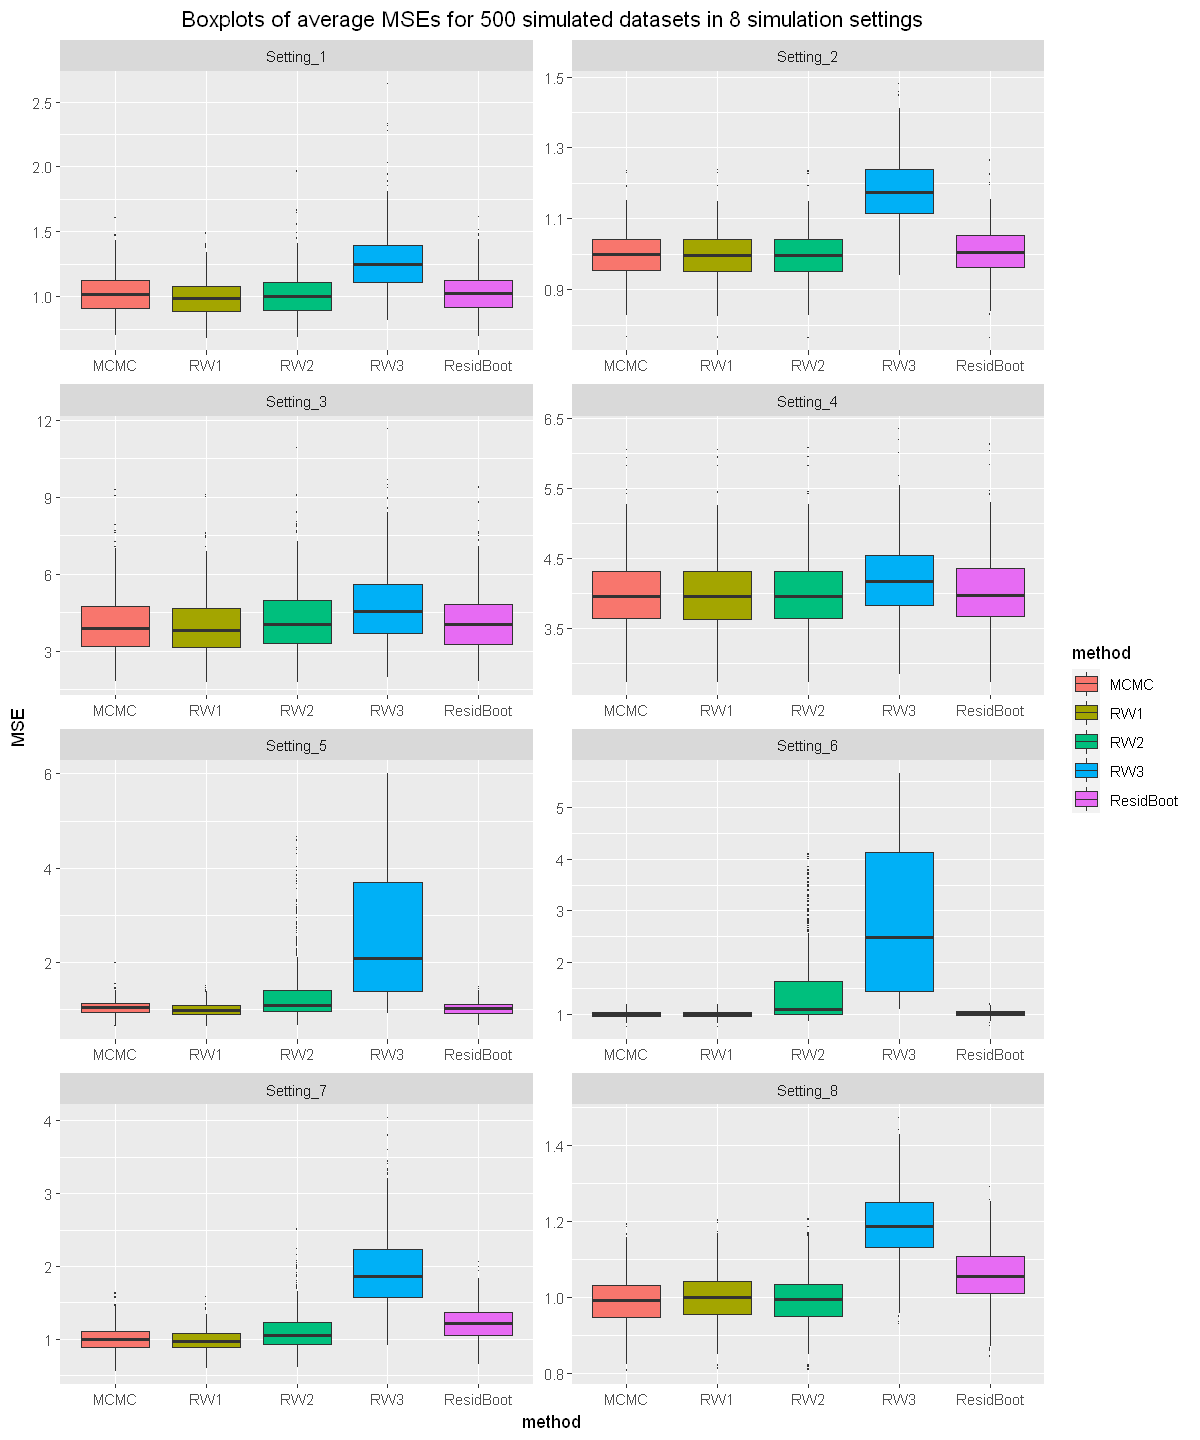

In [5]:
getval.func <- function(MCMC_item=1, item, list_vec = paste0("setting", 1:8,"_small")){
  vec <- NULL
  item_vec <- paste(item, c("MCMC", "RW1", "RW2", "RW3", "ResidBoot"), sep = "_")
  if(is.null(MCMC_item)){
    for(L in list_vec){
      list_L <- get(L)
      vec <- c(vec, c(
        list_L[names(list_L) == item_vec[2]][[1]],
        list_L[names(list_L) == item_vec[3]][[1]],
        list_L[names(list_L) == item_vec[4]][[1]],
        list_L[names(list_L) == item_vec[5]][[1]]
      ))
    }
  } else{
    for(L in list_vec){
      list_L <- get(L)
      vec <- c(vec, c(
        list_L[names(list_L) == item_vec[1]][[1]],
        list_L[names(list_L) == item_vec[2]][[1]],
        list_L[names(list_L) == item_vec[3]][[1]],
        list_L[names(list_L) == item_vec[4]][[1]],
        list_L[names(list_L) == item_vec[5]][[1]]
      ))
    }
  }
  return(vec)
}

MSE_df <- data.frame(
  value = getval.func(item = "MSE" ),
  method = rep( rep( c("MCMC", "RW1", "RW2", "RW3", "ResidBoot"), each = nsimul), 8 ),
  Setting = rep( paste0("Setting_", c(1:8)), each = 5*nsimul )
)
MSE_df$method <- factor(MSE_df$method, levels = c("MCMC", "RW1", "RW2", "RW3", "ResidBoot"))
ggplot(MSE_df, aes(x=method, y=value, fill=method)) +
  geom_boxplot(outlier.shape=".") +
  facet_wrap(~Setting, ncol = 2, scales = "free") +
  # coord_cartesian(ylim = c(0,7)) +
  labs(x="method", y= "MSE", title = "Boxplots of average MSEs for 500 simulated datasets in 8 simulation settings") + 
  theme(plot.title = element_text(hjust = 0.5))


# MSPE

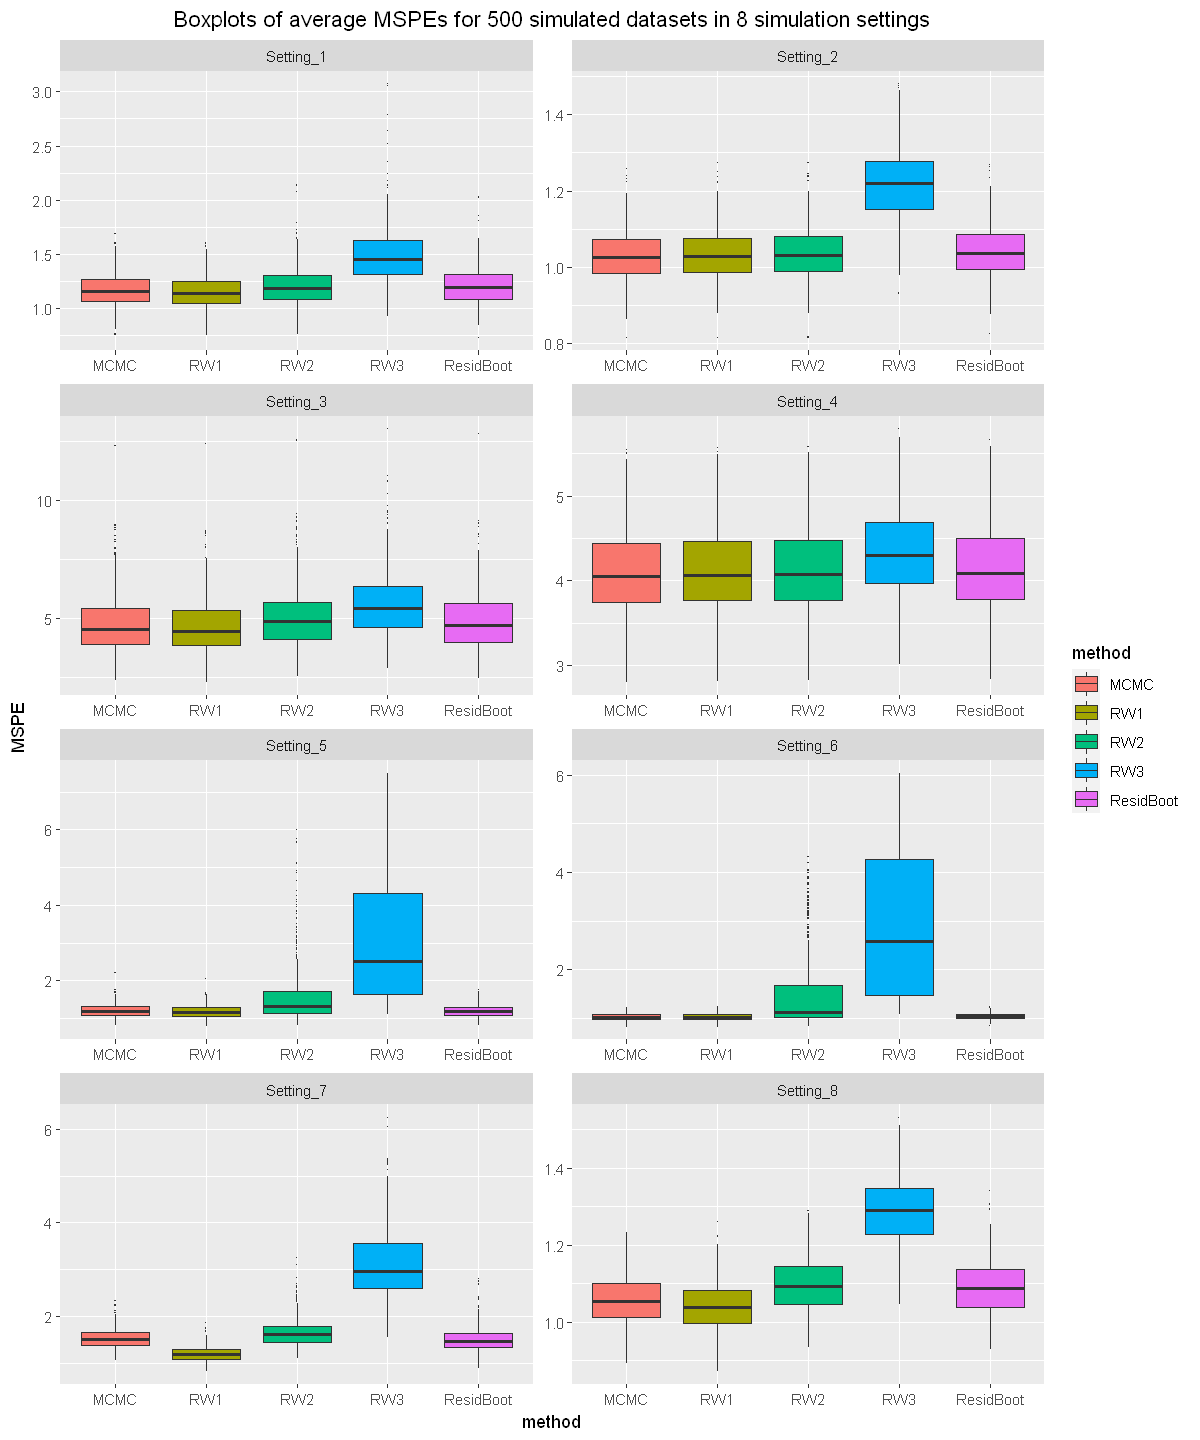

In [6]:
MSPE_df <- data.frame(
  value = getval.func(item = "MSPE" ),
  method = rep( rep( c("MCMC", "RW1", "RW2", "RW3", "ResidBoot"), each = nsimul), 8 ),
  Setting = rep( paste0("Setting_", c(1:8)), each = 5*nsimul )
)
MSPE_df$method <- factor(MSPE_df$method, levels = c("MCMC", "RW1", "RW2", "RW3", "ResidBoot"))
ggplot(MSPE_df, aes(x=method, y=value, fill=method)) +
  geom_boxplot(outlier.shape=".") +
  facet_wrap(~Setting, ncol = 2, scales = "free") +
  # coord_cartesian(ylim = c(0,8)) +
  labs(x="method", y= "MSPE", title = "Boxplots of average MSPEs for 500 simulated datasets in 8 simulation settings") + 
  theme(plot.title = element_text(hjust = 0.5))


# Total Variation

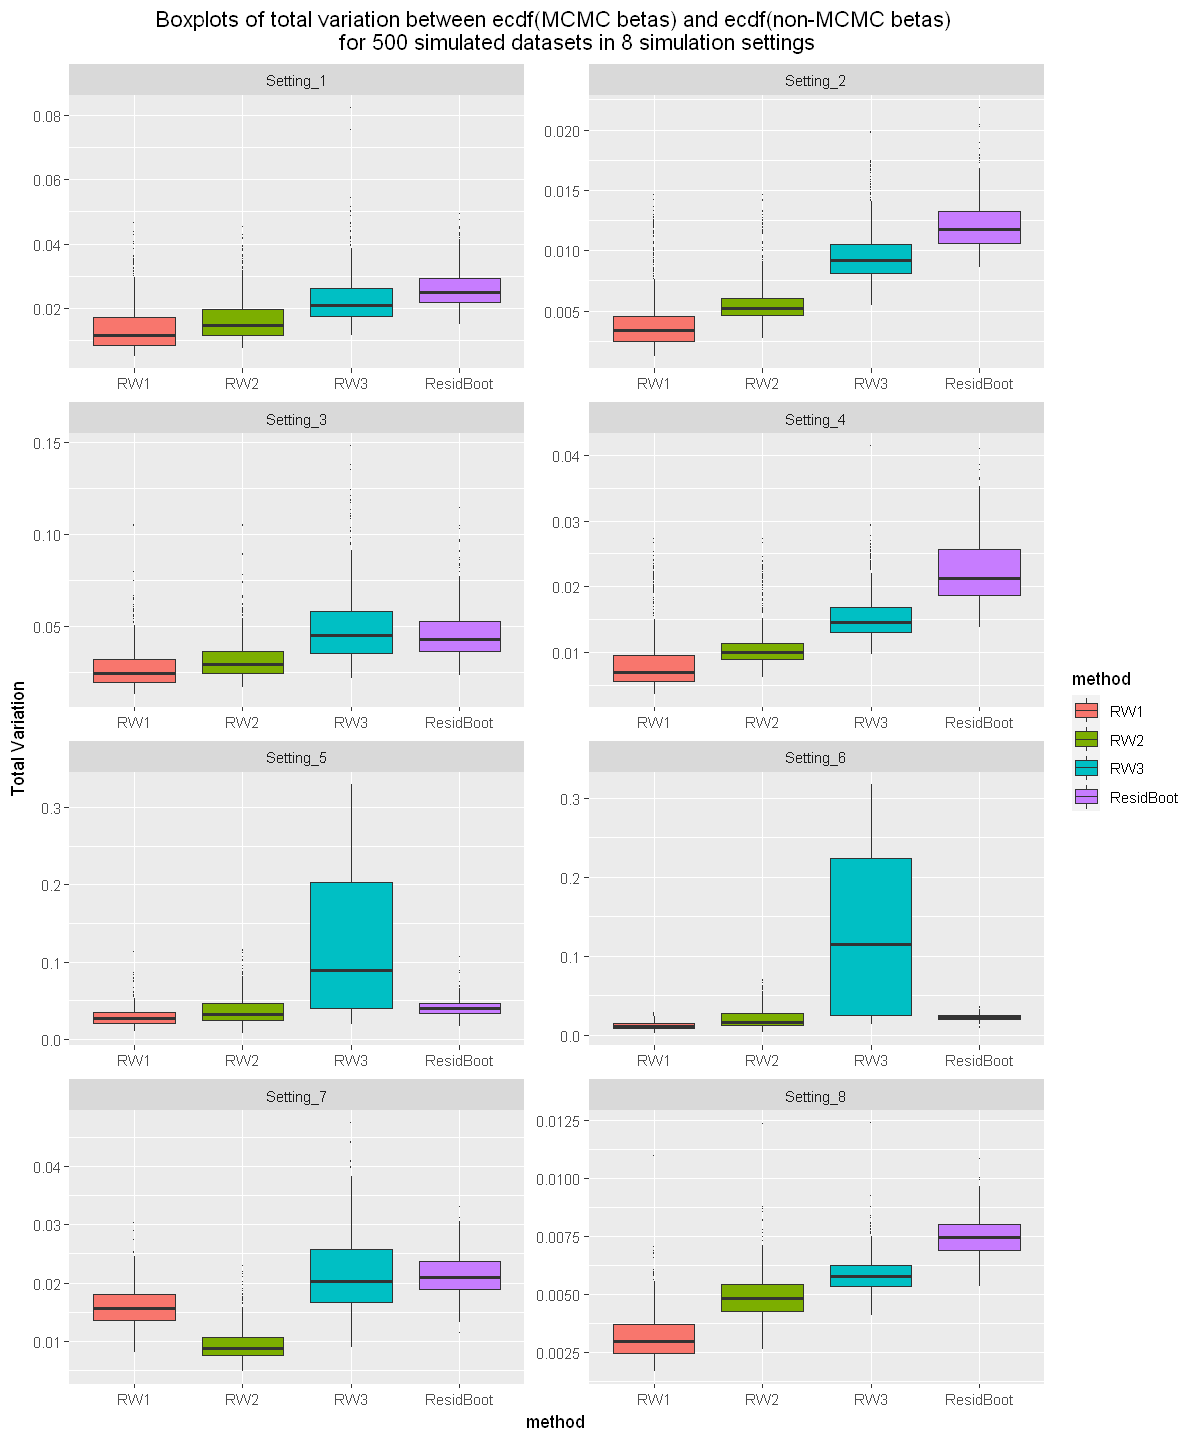

In [7]:
TV_df <- data.frame(
  value = getval.func(MCMC_item = NULL ,item = "TV" ),
  method = rep( rep( c("RW1", "RW2", "RW3", "ResidBoot"), each = nsimul), 8 ),
  Setting = rep( paste0("Setting_", c(1:8)), each = 4*nsimul )
)
TV_df$method <- factor(TV_df$method, levels = c("RW1", "RW2", "RW3", "ResidBoot"))
ggplot(TV_df, aes(x=method, y=value, fill=method)) +
  geom_boxplot(outlier.shape=".") +
  facet_wrap(~Setting, ncol = 2, scales = "free") +
  # coord_cartesian(ylim = c(0,8)) +
  labs(x="method", y= "Total Variation", title = "Boxplots of total variation between ecdf(MCMC betas) and ecdf(non-MCMC betas) 
       for 500 simulated datasets in 8 simulation settings") + 
  theme(plot.title = element_text(hjust = 0.5))


# Coverage probabilities for 90\% CI 

We have coverage probabilities for 90\% CI for all 10 variables in Simulation Settings 1-6 and for all 50 variables in Simulation Settings 7 and 8. We choose to show Variables 1 and 6 (relevant variables) as well as Variables 7 and 10 (irrelevant variables) as example. Other relevant variables show the same pattern as Variables 1 and 6, whereas other irrelevant variables show same pattern as Variables 7 and 10.

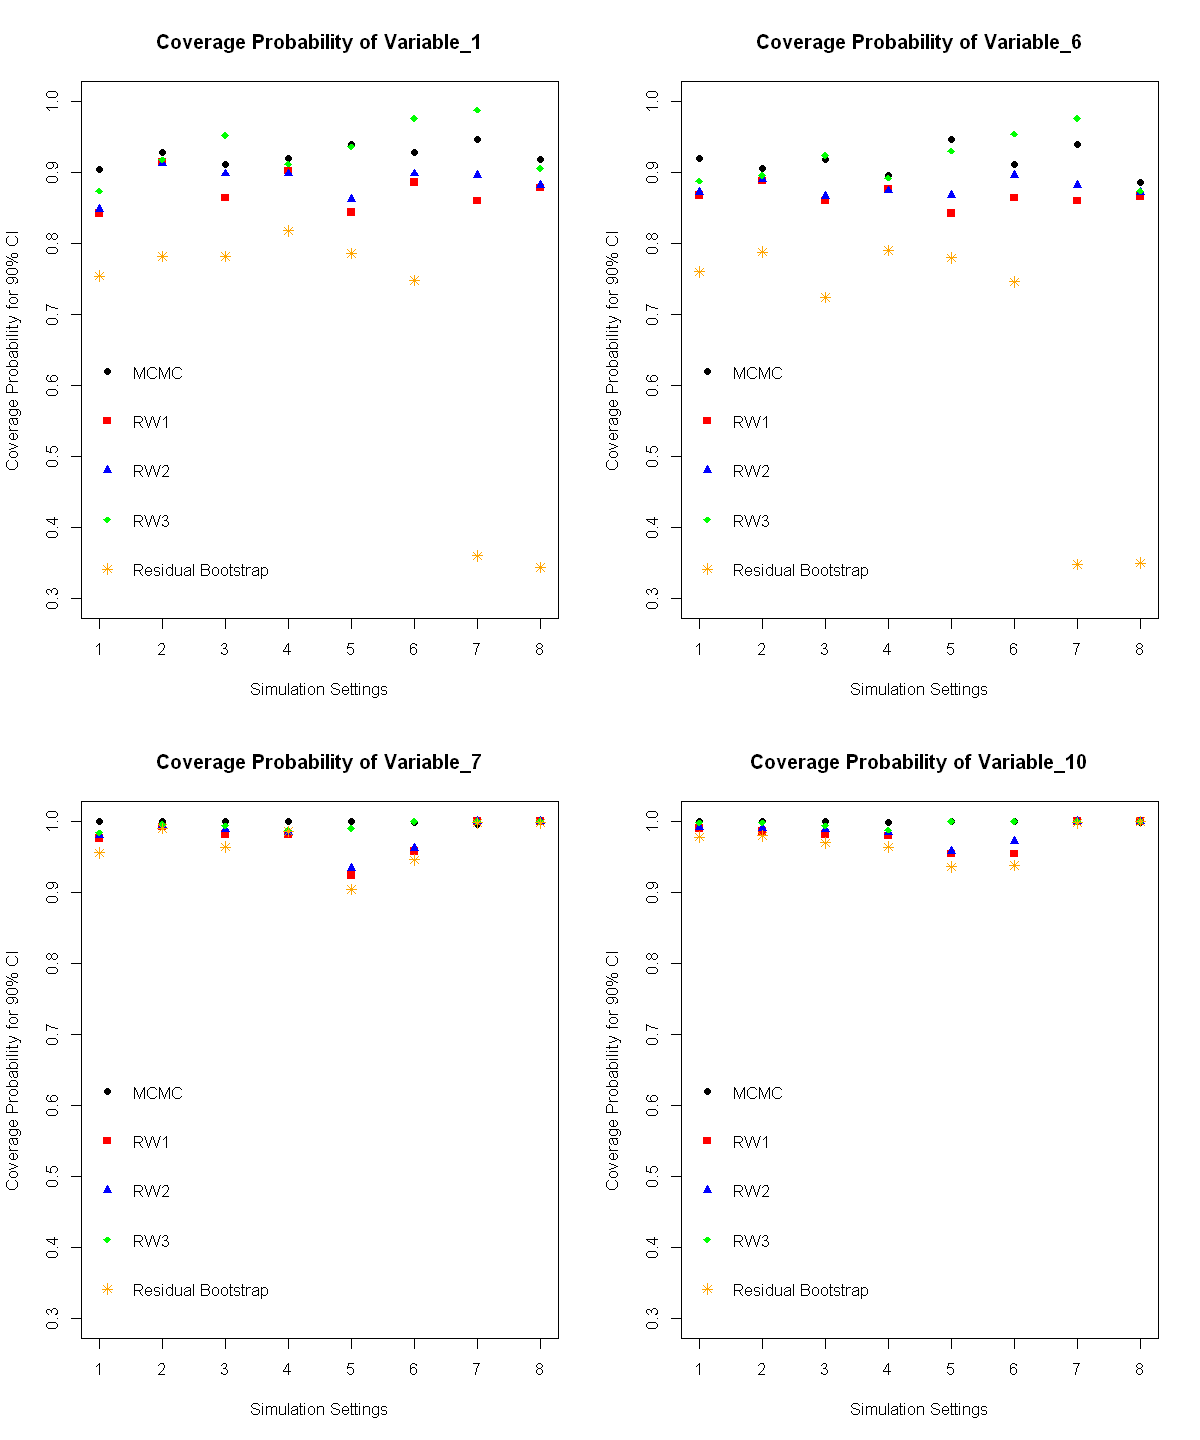

In [8]:
p1 = 10
p2 = 50

cover_df <- data.frame(
  value = getval.func(item = "Cover"),
  method = c(
    rep( rep( c("MCMC", "RW1", "RW2", "RW3", "ResidBoot"), each = p1), 6), # Settings 1-6
    rep( rep( c("MCMC", "RW1", "RW2", "RW3", "ResidBoot"), each = p2), 2)  # Settings 7&8
  ),
  variable = c(
    rep( c(1:10), 5*6),
    rep( c(1:50), 5*2)
  ),
  Setting = c(
    rep( paste0("Setting_", c(1:6)), each = 5*p1 ),
    rep( paste0("Setting_", c(7,8)), each = 5*p2 )
  )
)

coverplot.func <- function(var){
  range_var <- cover_df$value[cover_df$variable==var]
  # ylim = round(min(range_var),1),1)
  ylim = c(.3,1)
  if(var <= 10){
    ran = 1:8
  } else{
    ran = 7:8
  }
  plot(x=ran, y=cover_df$value[cover_df$method=="MCMC" & cover_df$variable==var], pch = 16, col = "black",
       xlab = "Simulation Settings", ylab = "Coverage Probability for 90% CI", ylim = ylim,
       main = paste0("Coverage Probability of Variable_",var))
  lines(x=ran, y=cover_df$value[cover_df$method=="RW1" & cover_df$variable==var], pch = 15, col = "red", type = "p")
  lines(x=ran, y=cover_df$value[cover_df$method=="RW2" & cover_df$variable==var], pch = 17, col = "blue", type = "p")
  lines(x=ran, y=cover_df$value[cover_df$method=="RW3" & cover_df$variable==var], pch = 18, col = "green", type = "p")
  lines(x=ran, y=cover_df$value[cover_df$method=="ResidBoot" & cover_df$variable==var], pch = 8, col = "orange", type = "p")
  legend('bottomleft', bty="n", pch=c(16,15,17,18,8), col = c("black", "red", "blue", "green", "orange"),
         c("MCMC", "RW1", "RW2", "RW3", "Residual Bootstrap"))
}

par(mfrow=c(2,2))
coverplot.func(1)
# coverplot.func(2)
# coverplot.func(3)
# coverplot.func(4)
# coverplot.func(5)
coverplot.func(6)
coverplot.func(7)
# coverplot.func(8)
# coverplot.func(9)
coverplot.func(10)
par(mfrow=c(1,1))


# Width of 90% CI 

We have width 90\% CI for all 10 variables in Simulation Settings 1-6 and for all 50 variables in Simulation Settings 7 and 8. We choose to show Variables 1 and 6 (relevant variables) as well as Variables 7 and 10 (irrelevant variables) as example. Other relevant variables show the same pattern as Variables 1 and 6, whereas other irrelevant variables show same pattern as Variables 7 and 10.

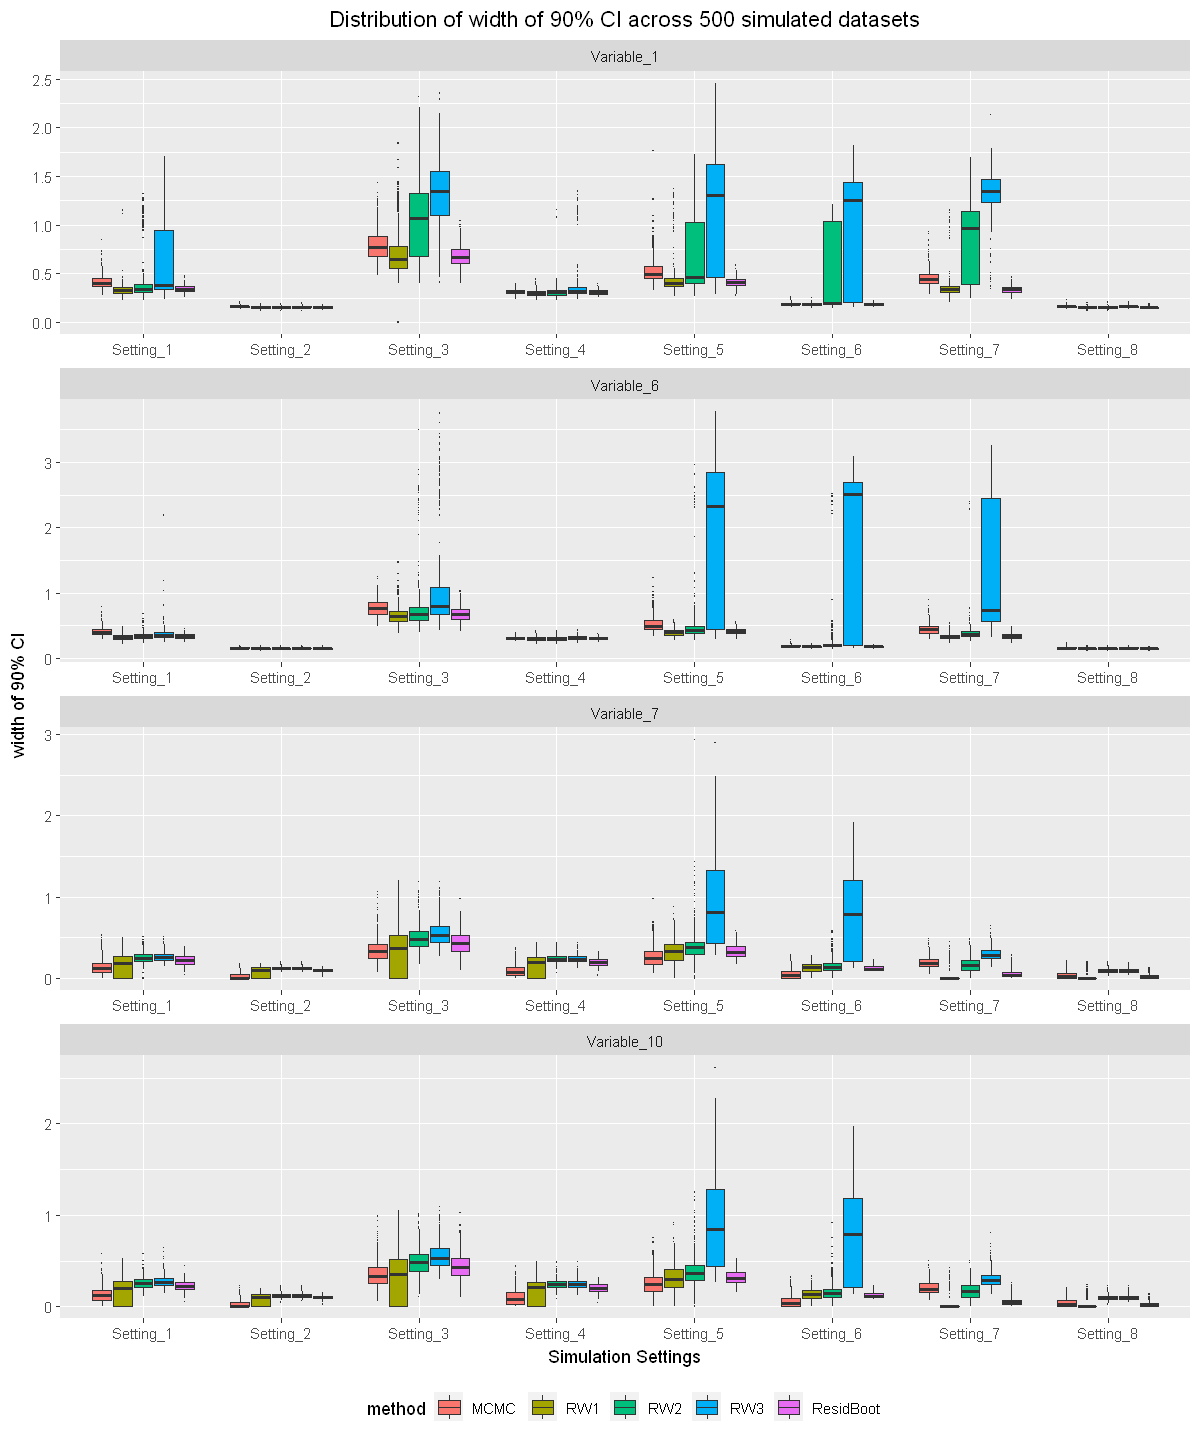

In [12]:
load("CIwidth.RData")
CIwidth_df$value = as.numeric(CIwidth_df$value)
CIwidth_df$variable = paste0("Variable_", CIwidth_df$variable)
CIwidth_df$method <- factor(CIwidth_df$method, levels = c("MCMC", "RW1", "RW2", "RW3", "ResidBoot"))
CIwidth_df$variable <- factor(CIwidth_df$variable, levels = paste0("Variable_", 1:50))

ggplot(CIwidth_df[CIwidth_df$variable %in% paste0("Variable_", c(1,6,7,10)),], aes(x = Setting, y = value)) +
  geom_boxplot(aes(fill = method), position = position_dodge2(preserve = "single"), outlier.shape=".") +
  facet_wrap(~variable, ncol = 1, scales = "free") +
  labs(title = "Distribution of width of 90% CI across 500 simulated datasets",
       x = "Simulation Settings", y = "width of 90% CI") +
  theme(plot.title = element_text(hjust = 0.5), legend.position = "bottom")


# Probability of Selecting a Variable

We have Pr(select a variable) for all 10 variables in Simulation Settings 1-6 and for all 50 variables in Simulation Settings 7 and 8. We choose to show Variables 1 and 6 (relevant variables) as well as Variables 7 and 10 (irrelevant variables) as example. Other relevant variables show the same pattern as Variables 1 and 6, whereas other irrelevant variables show same pattern as Variables 7 and 10.

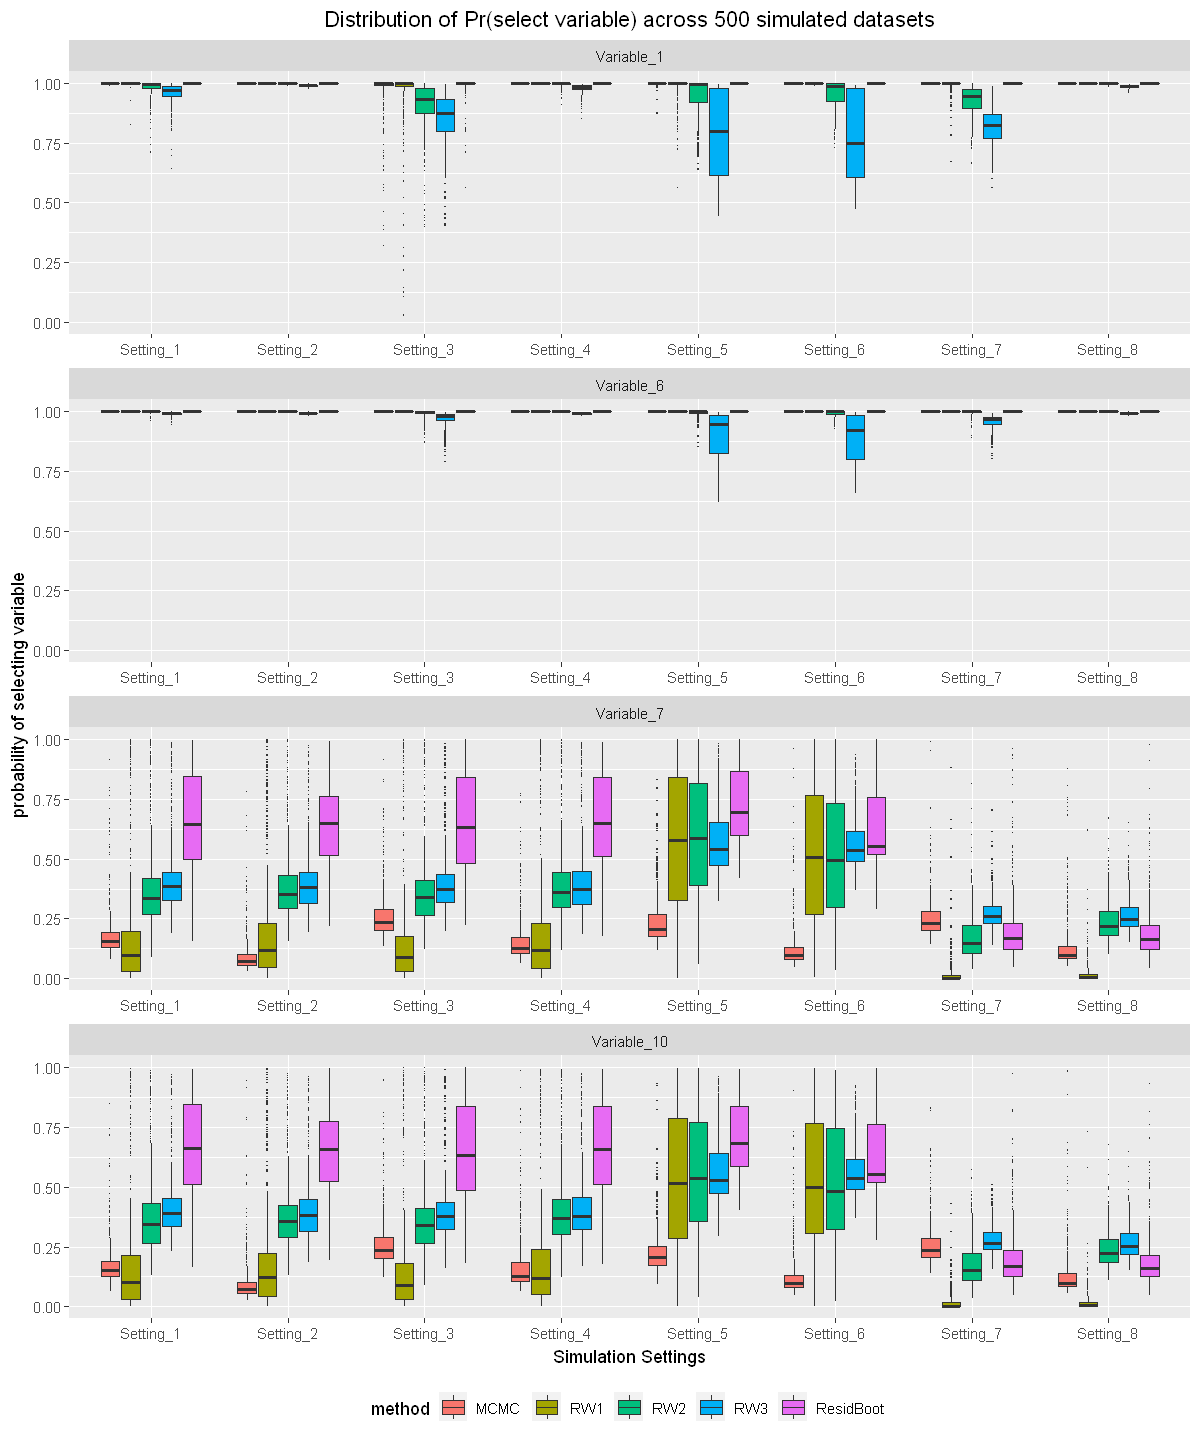

In [10]:
p1 = 10
p2 = 50

select_list <- paste0("setting", 1:8,"_small")
select_vec <- paste("select", c("MCMC", "RW1", "RW2", "RW3", "ResidBoot"), sep = "_")
select_df <- data.frame()
for(L in select_list){
  list_L <- get(L)
  for(s in select_vec){
    select_df <- rbind(
      select_df, 
      melt(list_L[names(list_L) == s][[1]])[,-1]
    )
  }
}
colnames(select_df) <- c("variable", "value")
select_df$variable <- paste0("Variable_", select_df$variable)
select_df$variable <- factor(select_df$variable, levels = paste0("Variable_", 1:50))

select_df$method = c(
  rep( rep( c("MCMC", "RW1", "RW2", "RW3", "ResidBoot"), each = nsimul*p1), 6),
  rep( rep( c("MCMC", "RW1", "RW2", "RW3", "ResidBoot"), each = nsimul*p2), 2)
)
select_df$method <- factor(select_df$method, levels = c("MCMC", "RW1", "RW2", "RW3", "ResidBoot"))

select_df$Setting = c(
  rep( paste0("Setting_", c(1:6)), each = 5*nsimul*p1 ),
  rep( paste0("Setting_", c(7,8)), each = 5*nsimul*p2 )
)

ggplot(select_df[select_df$variable %in% paste0("Variable_", c(1,6,7,10)),], aes(x = Setting, y = value)) +
  geom_boxplot(aes(fill = method), position = position_dodge2(preserve = "single"), outlier.shape=".") +
  facet_wrap(~variable, ncol = 1, scales = "free_x") +
  labs(title = "Distribution of Pr(select variable) across 500 simulated datasets",
       x = "Simulation Settings", y = "probability of selecting variable") +
  theme(plot.title = element_text(hjust = 0.5), legend.position = "bottom")
